In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
from statsmodels.graphics.factorplots import interaction_plot
import pandas as pd 
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('display.max_columns', None)

data = pd.read_excel(r"/home/mattias/Documents/class/hw8/hw8_q1.xlsx",
                     engine='openpyxl')

In [3]:
data = pd.read_excel(r"/home/mattias/Documents/class/hw8/hw8_q1.xlsx",engine='openpyxl')
model2 = ols("discharge_time_mins ~ C(battery_type,Sum) + C(connector_type,Sum) + C(battery_temp,Sum) + C(battery_type,Sum):C(connector_type,Sum) + C(battery_type,Sum):C(battery_temp,Sum) + C(connector_type,Sum):C(battery_temp,Sum)", data=data).fit()

aov_table = sm.stats.anova_lm(model2, typ=3)
print(aov_table)

                                               sum_sq   df           F  \
Intercept                                    730840.5  1.0  356.855713   
C(battery_type, Sum)                         382812.5  1.0  186.920166   
C(connector_type, Sum)                         1624.5  1.0    0.793213   
C(battery_temp, Sum)                            800.0  1.0    0.390625   
C(battery_type, Sum):C(connector_type, Sum)    1860.5  1.0    0.908447   
C(battery_type, Sum):C(battery_temp, Sum)      3200.0  1.0    1.562500   
C(connector_type, Sum):C(battery_temp, Sum)    1922.0  1.0    0.938477   
Residual                                       2048.0  1.0         NaN   

                                               PR(>F)  
Intercept                                    0.033669  
C(battery_type, Sum)                         0.046481  
C(connector_type, Sum)                       0.536788  
C(battery_temp, Sum)                         0.644385  
C(battery_type, Sum):C(connector_type, Sum)  0.515276

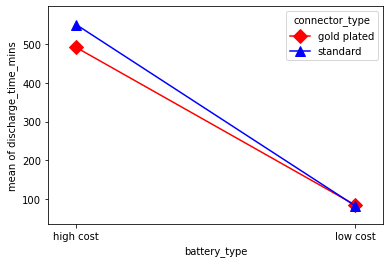

In [2]:
fig = interaction_plot(x=data['battery_type'], 
                       trace=data['connector_type'], 
                       response=data['discharge_time_mins'],
                       colors=['red','blue'], 
                       markers=['D','^'],
                       ms=10)
plt.show()

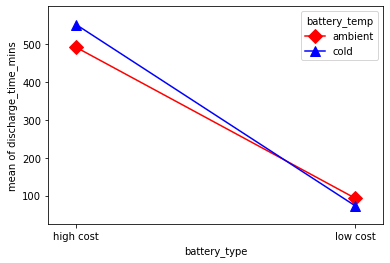

In [4]:
fig = interaction_plot(x=data['battery_type'],
                       trace=data['battery_temp'],
                       response=data['discharge_time_mins'],
                       colors=['red','blue'],
                       markers=['D','^'],
                       ms=10)
plt.show()

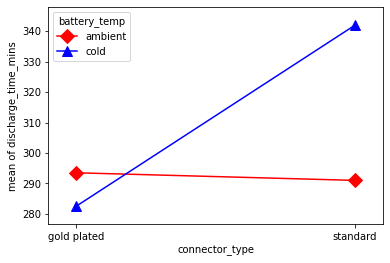

In [5]:
fig = interaction_plot(x=data['connector_type'],
                       trace=data['battery_temp'],
                       response=data['discharge_time_mins'],
                       colors=['red','blue'],
                       markers=['D','^'],
                       ms=10)
plt.show()

In [6]:
from scipy import stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel(r"/home/mattias/Documents/class/hw8/hw8_q2a.xlsx",
                     engine='openpyxl')

stats.f_oneway(df['brand_a'],df['brand_b'],df['brand_c'])

F_onewayResult(statistic=183.04118084842557, pvalue=5.134774834545265e-08)

In [7]:
stats.ttest_ind(df['brand_a'], df['brand_b'])

Ttest_indResult(statistic=13.48971012515763, pvalue=1.0287042362599023e-05)

In [9]:
stats.ttest_ind(df['brand_a'], df['brand_c'])

Ttest_indResult(statistic=14.16025693528037, pvalue=7.749109046452782e-06)

In [10]:
stats.ttest_ind(df['brand_b'], df['brand_c'])

Ttest_indResult(statistic=1.7698335069654876, pvalue=0.1271532898308866)